### Assessment Cover Page

Student Full Name: Choijamts Bayartai

Student Number: 2024150

Module Title: Machine Learning (10 ETCS)

Assessment Title: CA1

Assessment Due Date: 20-Mar-2024

Date of Submission:  21st April 2024

# Import Python Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Load the Dataset

In [29]:
df = pd.read_csv('ParisHousing.csv')

## Exploratory Data Analysis (EDA)

In [32]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


Check Data Types

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [35]:
df.shape

(10000, 17)

Summary Statistics for Numerical Columns

In [46]:
df.describe(include="all")

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


Cheking missing values

In [40]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [36]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


Checking correlations between numerical features.

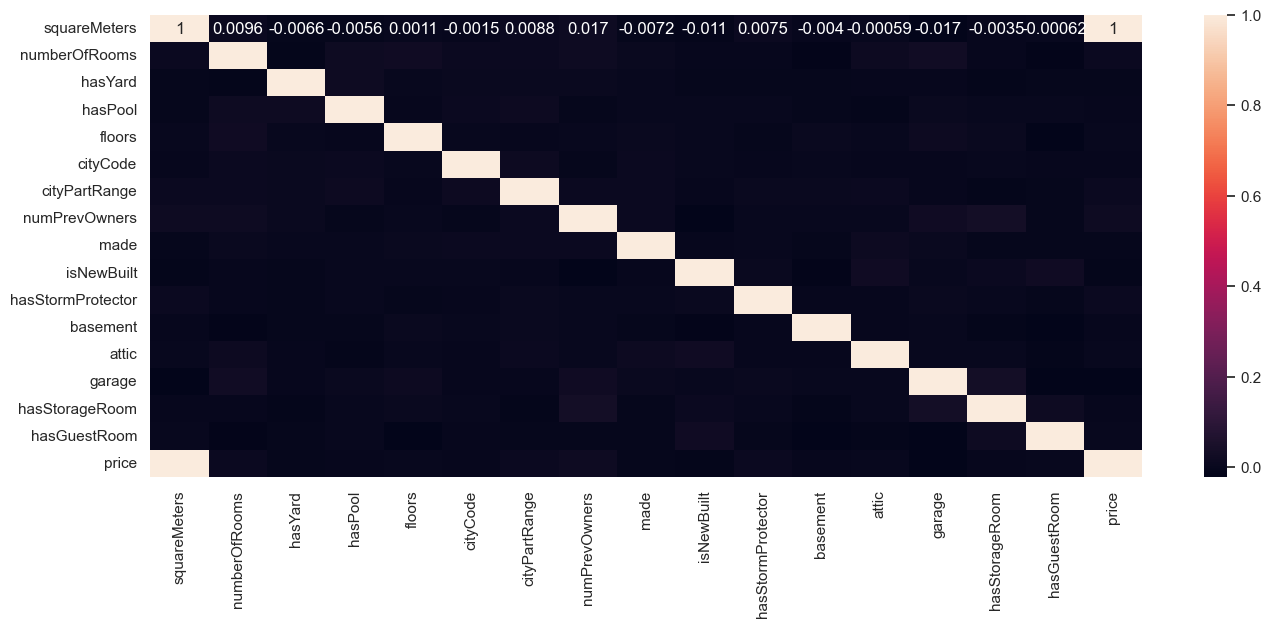

In [37]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(), annot=True)

In [38]:
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

TOTAL MISSING VALUES: 0


### The correlations between the price and other parameters, such as square meters and the number of rooms, may be shown with the use of scatter plots.

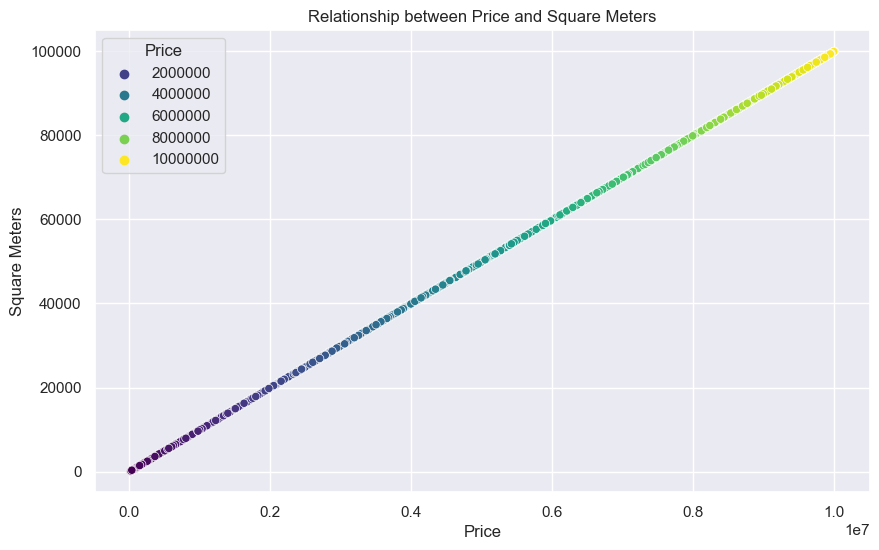

In [41]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="price", y="squareMeters", hue="price", palette="viridis")
plt.title("Relationship between Price and Square Meters")
plt.xlabel("Price")
plt.ylabel("Square Meters")
plt.legend(title='Price')
plt.show()

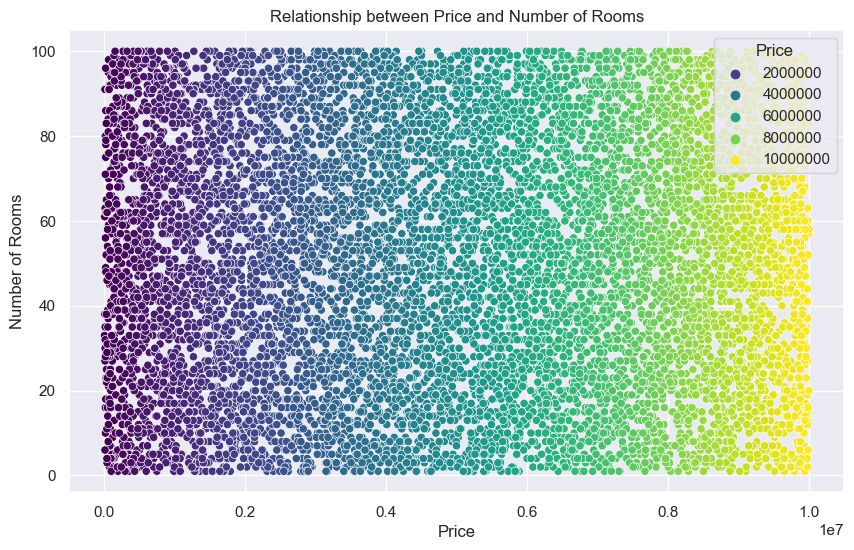

In [42]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="price", y="numberOfRooms", hue="price", palette="viridis")
plt.title("Relationship between Price and Number of Rooms")
plt.xlabel("Price")
plt.ylabel("Number of Rooms")
plt.legend(title='Price')
plt.show()

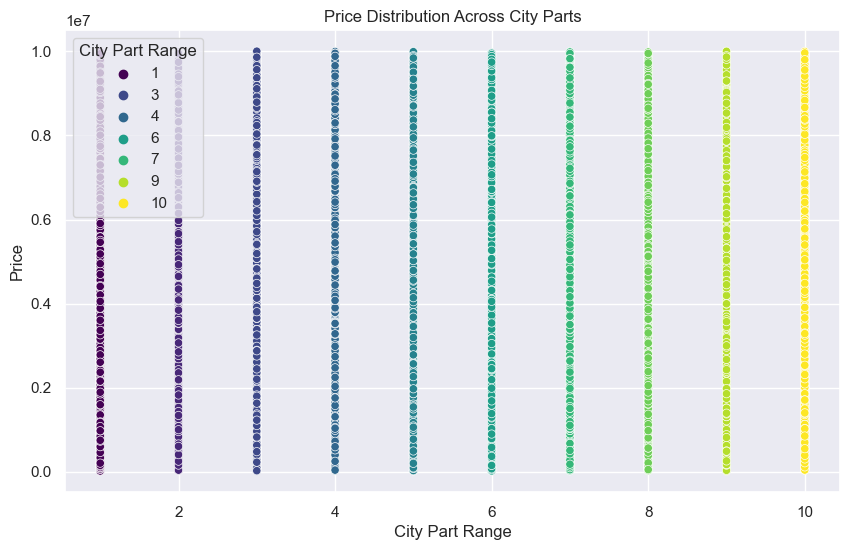

In [43]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x="cityPartRange", y="price", hue="cityPartRange", palette="viridis")
plt.title("Price Distribution Across City Parts")
plt.xlabel("City Part Range")
plt.ylabel("Price")
plt.legend(title='City Part Range')
plt.show()

### The distribution of features such as price and number of rooms is shown via histograms.

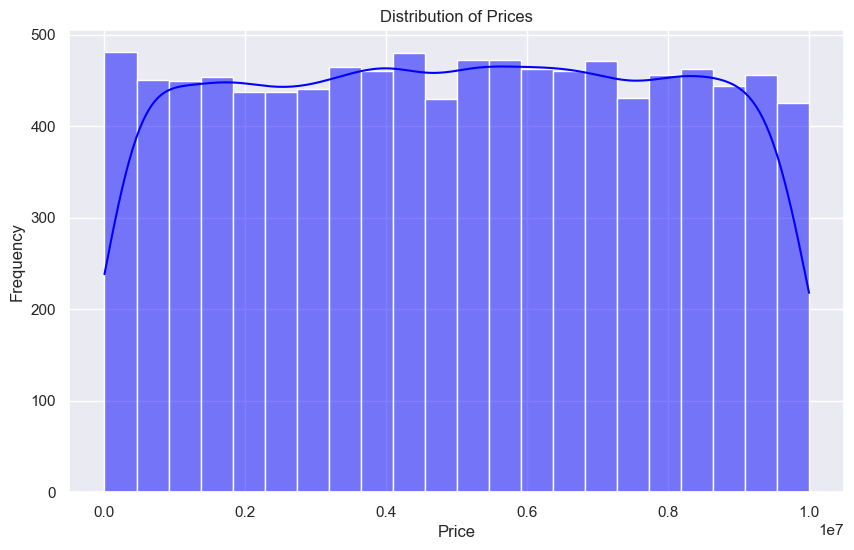

In [44]:
plt.figure(figsize=(10, 6))  
sns.histplot(data=df, x="price", kde=True, color='blue')  
plt.title("Distribution of Prices") 
plt.xlabel("Price")  
plt.ylabel("Frequency")  
plt.show()

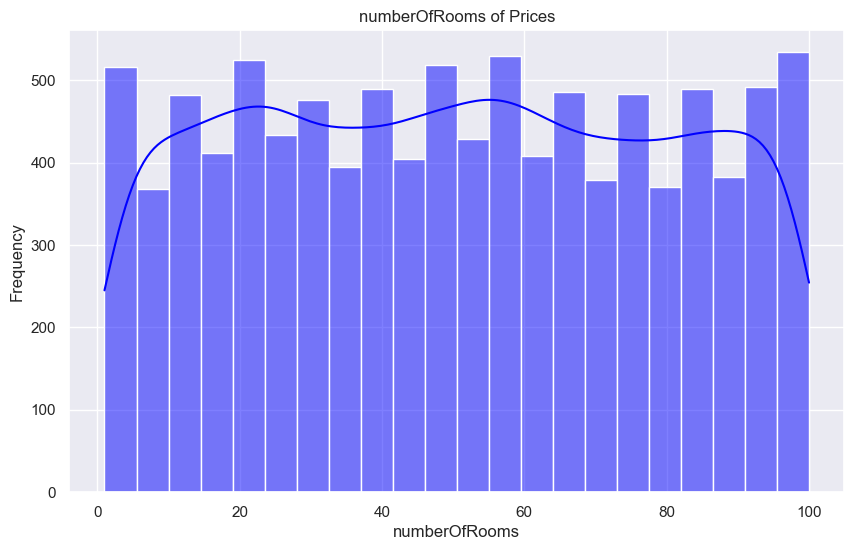

In [15]:
plt.figure(figsize=(10, 6))  
sns.histplot(data=df, x="numberOfRooms", kde=True, color='blue')  
plt.title("numberOfRooms of Prices") 
plt.xlabel("numberOfRooms")  
plt.ylabel("Frequency")  
plt.show()

# Data Preparation for Modeling

In [16]:
X=df.drop(['price'],axis = 1)
y=df['price']

In [17]:
X

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4


### Splitting dataset 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 16), (2500, 16), (7500,), (2500,))

### RMSE Cross-Validation Function (rmse_cv)

In [20]:
def rmse_cv(model, X, y):
    """Calculate the Root Mean Squared Error (RMSE) using cross-validation."""
    neg_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse = np.sqrt(-neg_mse).mean()
    return rmse

def evaluation(y_true, y_pred):
    """Evaluate the model's performance using various metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_true, y_pred)
    return mae, mse, rmse, r_squared


Model Training and Evaluation

In [21]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Training a linear regression model and a random forest regressor

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

rmse_cross_val = rmse_cv(lin_reg, X, y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({
    "Model": ["LinearRegression"],
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "R2 Score": [r_squared],
    "RMSE (Cross-Validation)": [rmse_cross_val]
})
models = pd.concat([models, new_row], ignore_index=True)


MAE: 1491.6612375945676
MSE: 3633660.3967133574
RMSE: 1906.2162512981988
R2 Score: 0.9999995799415964
------------------------------
RMSE Cross-Validation: 1900.3120388158168


In [23]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

rmse_cross_val = rmse_cv(random_forest, X, y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({
    "Model": ["RandomForestRegressor"],
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "R2 Score": [r_squared],
    "RMSE (Cross-Validation)": [rmse_cross_val]
})
models = pd.concat([models, new_row], ignore_index=True)


MAE: 3175.544906000027
MSE: 16164741.781541131
RMSE: 4020.5399863129246
R2 Score: 0.9999981313235451
------------------------------
RMSE Cross-Validation: 3853.312007443531


# Comparing Model Performance

In [24]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,1491.661238,3.633660e+06,1906.216251,1.000000,1900.312039
1,RandomForestRegressor,3175.544906,1.616474e+07,4020.539986,0.999998,3853.312007


### The RMSE scores from cross-validation of various models are compared using a bar plot, which gives a clear visual representation of the best performing model.

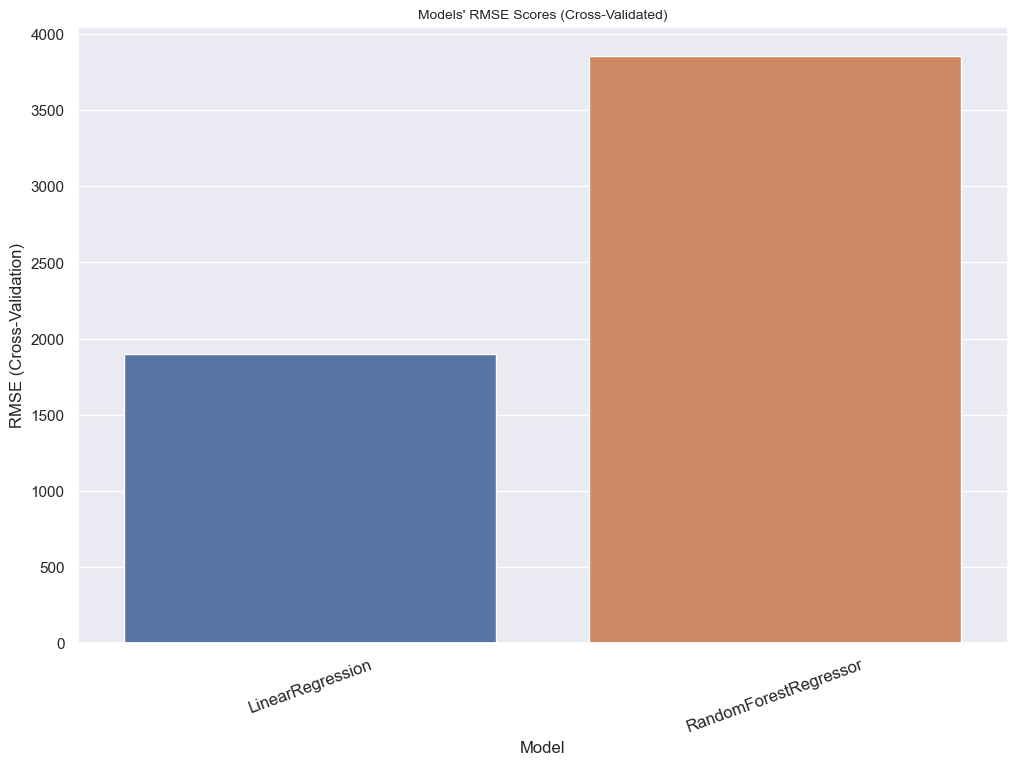

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=10)
plt.xticks(rotation=20, size=12)
plt.show()